In [ ]:
import os
import cv2
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

move dataset to directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks


Load Training Datasets

In [ ]:
def Enhancement(image):

  #histogram equalization

  image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  enhanced_image=image.copy()

  red_channel = image[:,:,0].copy()
  green_channel = image[:,:,1].copy()
  blue_channel = image[:,:,2].copy()
  enhanced_image[:,:,0] = cv2.equalizeHist(red_channel)
  enhanced_image[:,:,1] = cv2.equalizeHist(green_channel)
  enhanced_image[:,:,2] = cv2.equalizeHist(blue_channel)

  laplacian = cv2.Laplacian(enhanced_image,cv2.CV_64F, ksize=3)
  enhanced_img = cv2.convertScaleAbs(enhanced_image-laplacian)

  '''
  #K-means segmentation
  r,g,b=cv2.split(enhanced_image)
  img_hsv=cv2.cvtColor(enhanced_image, cv2.COLOR_RGB2HSV)
  h,s,v=cv2.split(img_hsv)
  img_gray=0.7*s+0.3*v
  x=img_gray.flatten().reshape(-1,1)
  kmeans=KMeans(n_clusters=2, n_init='auto')
  kmeans.fit(x)
  label=kmeans.predict(x)
  bin=label.reshape(img_gray.shape)
  enhanced_image[:,:,0]=r*bin
  enhanced_image[:,:,1]=g*bin
  enhanced_image[:,:,2]=b*bin
  '''
  '''
  #edge detection using sobel operators
  enhanced_image=cv2.cvtColor(enhanced_image, cv2.COLOR_RGB2GRAY)
  #horizontal 1,0
  sobelx=cv2.Sobel(enhanced_image, cv2.CV_64F,1,0, ksize=1)
  #vertical
  sobely=cv2.Sobel(enhanced_image, cv2.CV_64F,0,1, ksize=1)

  enhanced_image=np.sqrt(sobelx**2 + sobely**2)
  '''

  return enhanced_image

In [ ]:

#set the path to the dataset directory
dataset_dir = '/content/drive/MyDrive/Colab Notebooks/animal/animal/'

#initialize empty lists for storing training data and labels
train_data=[]
train_labels=[]

#load training data
train_dir = os.path.join(dataset_dir, 'training_set')
for class_name in os.listdir(train_dir):
  class_dir = os.path.join(train_dir, class_name)
  for image_name in os.listdir(class_dir):
    image_path = os.path.join(class_dir, image_name)
    image = cv2.imread(image_path)
    image = cv2.resize(image,(200,200), interpolation=cv2.INTER_AREA)
    image =  Enhancement(image)
    train_data.append(image.flatten())
    train_labels.append(class_name)
    print(image.shape)

#convert the lists to numpy arrays
train_data = np.array(train_data)
train_labels = np.array(train_labels)

Output streaming akan dipotong hingga 5000 baris terakhir.
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(20

In [ ]:
#initialize empty lists for storing training data and labels
test_data=[]
test_labels=[]

#load training data
test_dir = os.path.join(dataset_dir, 'test_set')
for class_name in os.listdir(test_dir):
  class_dir = os.path.join(test_dir, class_name)
  for image_name in os.listdir(class_dir):
    image_path = os.path.join(class_dir, image_name)
    image = cv2.imread(image_path)
    image = cv2.resize(image,(200,200), interpolation=cv2.INTER_AREA)
    image =  Enhancement(image)
    test_data.append(image.flatten())
    test_labels.append(class_name)
    print(image.shape)

#convert the lists to numpy arrays
test_data = np.array(test_data)
test_labels = np.array(test_labels)

(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 

In [ ]:

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(train_data, train_labels)

predictions = knn.predict(test_data)

accuracy = accuracy_score(test_labels,predictions)
print ("Accuracy of KNN:", accuracy)
'''
classifier = svm.SVC()
classifier.fit(train_data, train_labels)

y_pred = classifier.predict(test_data)

accuracy = accuracy_score(test_labels,predictions)
print("accuracy of svm:", accuracy)
'''

Accuracy of KNN: 0.572514619883041


'\nclassifier = svm.SVC()\nclassifier.fit(train_data, train_labels)\n\ny_pred = classifier.predict(test_data)\n\naccuracy = accuracy_score(test_labels,predictions)\nprint("accuracy of svm:", accuracy)\n'

Predicted class: ['dogs']


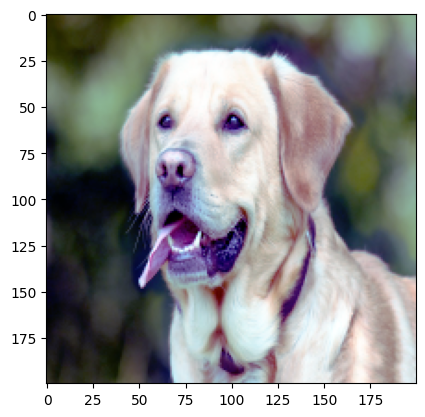

In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/animal/animal/single_prediction/cat_or_dog_1.jpg"
image=cv2.imread(image_path)
image=cv2.resize(image,(200,200), interpolation=cv2.INTER_AREA)
image=Enhancement(image)
plt.imshow(image)
image=image.flatten()
predicted_class=knn.predict([image])
print("Predicted class:", predicted_class)

In [ ]:

img=cv2.imread('/content/cat.8.jpg')
img=cv2.resize(img,(200,200), interpolation=cv2.INTER_AREA)
img=Enhancement(img)
# img=img/255
# img=1-img
# plt.hist(img.ravel(), bins=256, histtype='step', color='green')
# plt.xlim(0,1)
# plt.show()
plt.imshow(img)
plt.show()

error: ignored